In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=["target"])

In [2]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="SGD")
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 1.3406 - val_loss: 0.5607
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4667 - val_loss: 0.5585
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4047 - val_loss: 0.3966
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3794 - val_loss: 0.3826
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3815 - val_loss: 0.3501
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3757 - val_loss: 0.3447
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3833 - val_loss: 0.3387
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3560 - val_loss: 0.3495
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3604 - val_loss: 0.3406
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3562 - val_loss: 0.3306

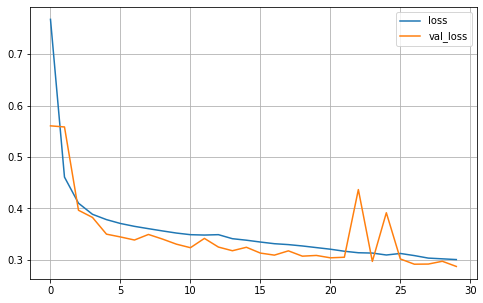

In [4]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [5]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 2ms/step - loss: 0.3040


In [6]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = tf.keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 0.2890 - val_loss: 0.2841
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.2787 - val_loss: 0.2838
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.2923 - val_loss: 0.2832
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.2968 - val_loss: 0.2834
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.2848 - val_loss: 0.2837
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.2928 - val_loss: 0.2828
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.2793 - val_loss: 0.2840
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.2839 - val_loss: 0.2831
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.2904 - val_loss: 0.2832
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.2989


In [7]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 0.2900 - val_loss: 0.2828
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2828 - val_loss: 0.2834
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2897 - val_loss: 0.2833
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2859 - val_loss: 0.2825
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2943 - val_loss: 0.2842
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2917 - val_loss: 0.2822
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2830 - val_loss: 0.2823
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2755 - val_loss: 0.2816
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2987 - val_loss: 0.2812
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2870 - val_lo

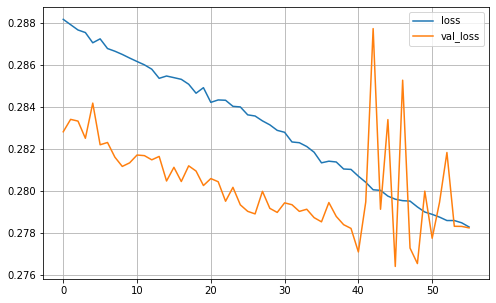

In [8]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.gca().set_ylim(0, 1)
plt.grid(True)